Exercise: Outlier removal using standard deviation and z score

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [101]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [102]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [103]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

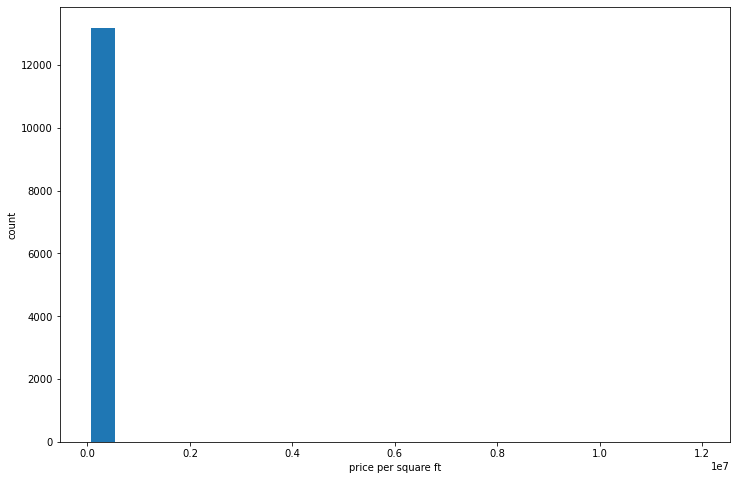

In [105]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price per square ft')
plt.ylabel('count')
plt.show()

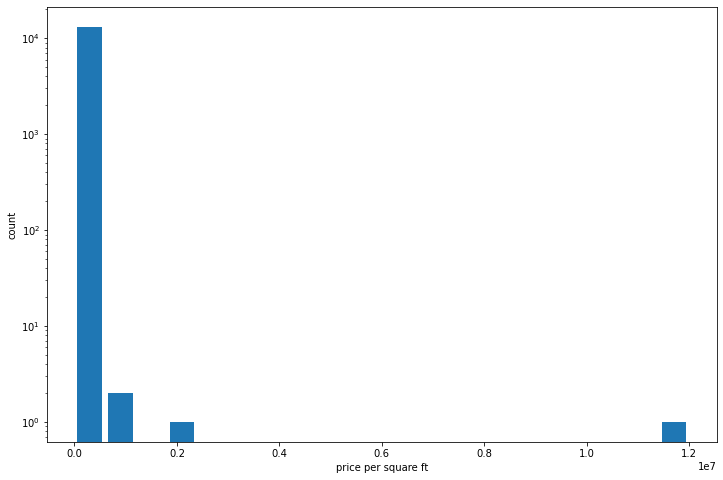

In [106]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price per square ft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

# (1) treat outliers using percentile first

In [107]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [108]:
outliers = df[( df.price_per_sqft>upper_limit)|(df.price_per_sqft<lower_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [109]:
df2 = df[( df.price_per_sqft<upper_limit)&(df.price_per_sqft>lower_limit)]
df2.shape

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [110]:
df2.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

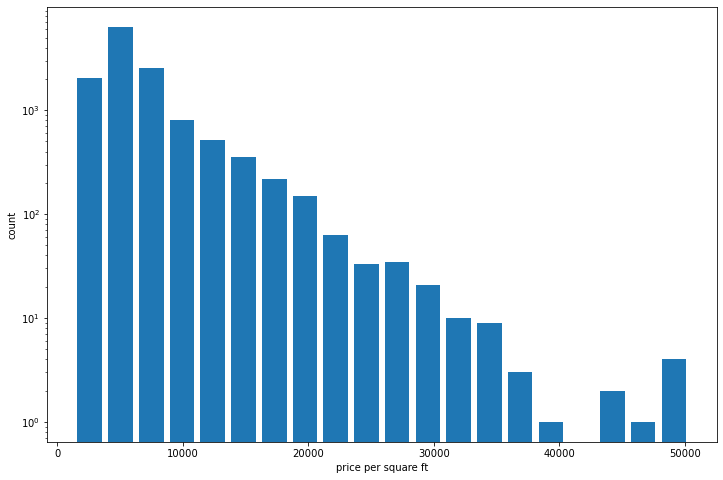

In [111]:
plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price per square ft')
plt.ylabel('count')
plt.yscale('log')
plt.show()

In [112]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [113]:
df.shape

(13200, 7)

In [114]:
df.shape[0] - df2.shape[0]

28

 we removeed total 28 outliers

# 2 now remove outliers using 4 standard deviation

In [115]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() -4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [116]:
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [117]:
df2[(df2.price_per_sqft>max_limit)|(df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7110,BEML Layout,3 Bedroom,1200.0,5.0,325.0,3,27083
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
5974,other,4 Bedroom,2360.0,4.0,650.0,4,27542
6744,HAL 2nd Stage,2 Bedroom,600.0,3.0,145.0,2,24166
2618,Malleshwaram,7 Bedroom,3000.0,4.0,900.0,7,30000
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000
1659,Whitefield,5 Bedroom,3250.0,5.0,900.0,5,27692


In [118]:
df3 = df2[(df2.price_per_sqft>min_limit)&(df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [119]:
df2.shape[0]-df3.shape[0]

125

In [120]:
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


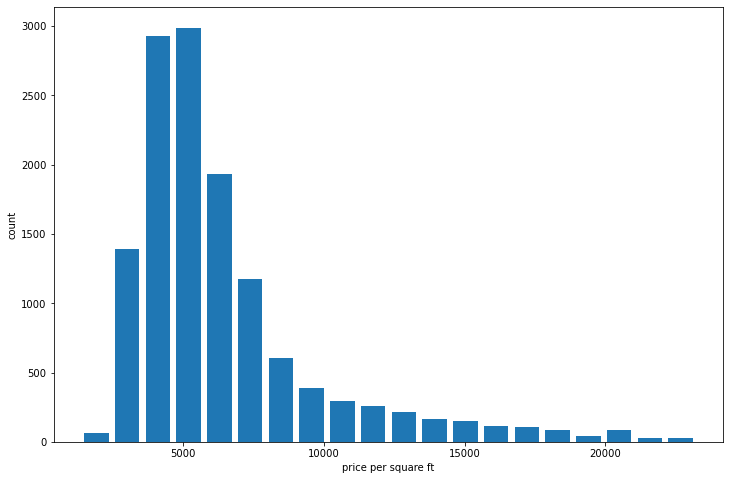

In [121]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price per square ft')
plt.ylabel('count')
plt.show()

In [122]:
df3.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

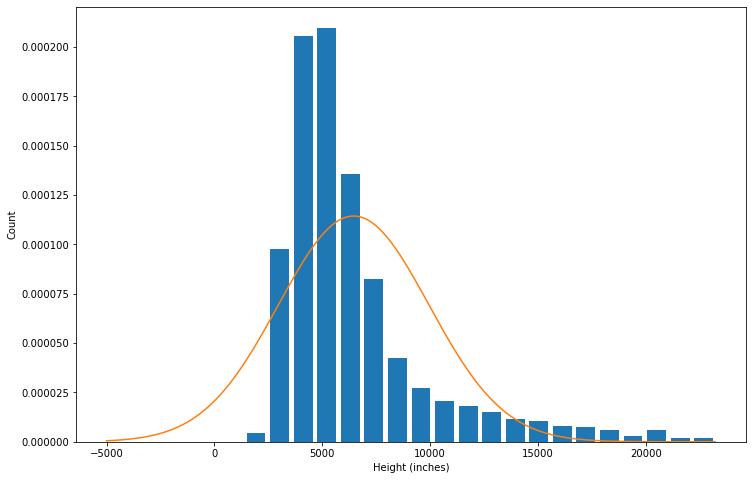

In [123]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

# (3) Now remove outliers using z score. Use z score of 4 as your thresold


In [124]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

<ipython-input-124-70754eb1335e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9756,Sarjapur,2 BHK,850.0,2.0,32.00,2,3764,-0.700227
10685,Hormavu,3 Bedroom,1800.0,3.0,204.00,3,11333,1.127583
2449,Budigere,2 BHK,1139.0,2.0,56.85,2,4991,-0.403923
6697,Sarjapur Road,2 BHK,1320.0,2.0,115.00,2,8712,0.494648
6677,Kudlu,2 BHK,1024.0,2.0,44.00,2,4296,-0.571756
5479,Whitefield,2 BHK,1227.0,2.0,53.49,2,4359,-0.556542
11990,Thanisandra,3 BHK,1806.0,6.0,116.00,3,6423,-0.058115
2043,Magadi Road,3 BHK,1322.0,2.0,58.82,3,4449,-0.534809
3490,Raja Rajeshwari Nagar,2 BHK,1140.0,2.0,38.55,2,3381,-0.792716
12290,Yelahanka,4 BHK,2650.0,4.0,223.00,4,8415,0.422926


In [125]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [126]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5747,other,5 Bedroom,1200.00,5.0,300.0,5,25000,4.427977
9711,Rajaji Nagar,2 Bedroom,1056.00,1.0,250.0,2,23674,4.107767
12640,other,3 BHK,2777.29,5.0,649.0,3,23368,4.033872
6134,Basavangudi,6 Bedroom,1754.00,6.0,650.0,6,37058,7.339820
8650,HAL 2nd Stage,4 Bedroom,2400.00,4.0,650.0,4,27083,4.930994


In [127]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [128]:
df2.shape[0] - df4.shape[0]

125